In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [2]:
with open("merged_clean.txt", "r") as f:
    file = f.read().split("\n\n")
    file = np.array(file)
paragraphs = [a for a in file if len(a.split(" ")) > 5]
corpus = [a.replace("\n", " ") for a in paragraphs]

In [3]:
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(corpus)
words = np.array([a for a in tokenizer.index_word.values()])

print(words[:100])

['<OOV>' 'the' 'and' 'to' 'of' 'a' 'he' 'in' 'was' 'i' 'his' 'that' 'it'
 'her' 'she' 'you' 'with' 'him' 'for' 'had' 'as' 'but' "'" 'they' 'said'
 'on' 'not' 'is' 'at' 'my' 'so' 'be' 'me' 'all' 'this' 'when' 'have' 'one'
 'from' 'then' 'by' 'them' 'which' 'were' 'will' 'out' 'who' 'there' 'up'
 'what' 'little' 'into' 'if' 'no' 'their' 'would' 'man' 'could' 'king'
 'are' 'old' 'came' 'went' 'do' 'very' 'we' 'your' 'now' 'or' 'before'
 'day' 'down' 'an' 'time' 'did' 'been' 'after' 'upon' 'see' 'like' 'where'
 'more' 'go' 'great' 'some' 'over' 'only' 'about' 'come' 'again' 'thou'
 'must' 'back' 'himself' 'two' 'saw' 'took' 'away' 'than' 'how']


In [4]:
vocab_size = 2000
shortened_corpus = []
for line in corpus:
    sequence = tokenizer.texts_to_sequences([line])[0]
    discard = False
    for i in sequence:
        if i > vocab_size:
            discard = True
    if discard == False:
        shortened_corpus.append(line)

print(len(corpus))
print(len(shortened_corpus))
print(shortened_corpus)


39815
3942
["There was once a king's son who told his father that he wished to marry.", "'Yes, indeed, I've lived long and been much about in the world, but I have never seen or heard anything of what you ask. Still, if you will wait till to-morrow I may be able to tell you something.'", "'Good evening to you, my dear son,' answered the old woman. 'It is lucky for you that you spoke to me or you would have met with a horrible death. But may I ask where are you going?'", 'This time the water was ready and the girl did not fly away, but she and the prince promised to love each other always. Then they set out for home.', 'At supper that night the queen offered the king all sorts of nice things to eat and drink, but he declared he was not hungry, and went early to bed.', 'With that they set out on their journey.', 'The prince said he would do so, and continued his journey.', "'I am looking for Lucky Luck,' replied the prince.", 'With that she showed him the way, and the prince went and did

In [5]:
print(len(shortened_corpus))
shortened_corpus = [a for a in shortened_corpus if 5 <=len(a.split(" ")) <= 20]
print(len(shortened_corpus))
print(shortened_corpus)

3942
2967
["There was once a king's son who told his father that he wished to marry.", 'With that they set out on their journey.', 'The prince said he would do so, and continued his journey.', "'I am looking for Lucky Luck,' replied the prince.", "'Yes, your Majesty, it was I,' answered the prince.", "'But where did you get your army?'", "'If you wish to see it, I can show it you outside the city walls.'", "Not long after there was a grand wedding; perhaps they may all be alive still, but I don't know.", 'The king heard of this and was very angry, and sent for the shepherd to appear before him.', "'To my good health!' replied the shepherd.", "'To mine, to mine, your Majesty,' was the answer.", 'But the shepherd only gave the same answer:', "'I won't say it till the princess is my wife.'", "'I will not say it till the princess is my wife.'", "'No; I will not say it till I have the princess for my wife.'", "'No, no; I will not say it till I have the princess for my wife.'", "'Is the isla

In [6]:
input_sequences = []
for line in shortened_corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [7]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen = max_sequence_len, padding = "pre")

In [8]:
xs = input_sequences[: ,:-1]
labels = input_sequences[: ,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes = vocab_size)

In [9]:
print(xs[:10])
print(ys[1])

print(len(xs))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0  48]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  48   9]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  48   9 137]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   48   9 137   6]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  48
    9 137   6 241]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  48   9
  137   6 241 125]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  48   9 137
    6 241 125  47]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48   9 137   6
  241 125  47 139]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  48   9 137   6 241
  125  47 139  11]
 [  0   0   0   0   0   0   0   0   0   0   0   0  48   9 137   6 241 125
   47 139  11 129]]
[0. 0. 0. ... 0. 0. 0.]
32124


In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 240, input_length = max_sequence_len - 1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200)),
    tf.keras.layers.Dense(vocab_size, activation = "softmax")
])

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model.summary()

2024-07-03 11:09:20.406509: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-07-03 11:09:20.406724: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-07-03 11:09:20.406734: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-07-03 11:09:20.407449: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-03 11:09:20.407479: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 22, 240)           480000    
                                                                 
 bidirectional (Bidirectiona  (None, 400)              705600    
 l)                                                              
                                                                 
 dense (Dense)               (None, 2000)              802000    
                                                                 
Total params: 1,987,600
Trainable params: 1,987,600
Non-trainable params: 0
_________________________________________________________________


2024-07-03 11:09:20.691036: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-07-03 11:09:20.691592: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-07-03 11:09:20.692041: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [12]:
history = model.fit(xs, ys, epochs = 100, verbose = 1, batch_size = 200, shuffle=True)

Epoch 1/100


InvalidArgumentError: Cannot assign a device for operation sequential/embedding/embedding_lookup: Could not satisfy explicit device specification '' because the node {{colocation_node sequential/embedding/embedding_lookup}} was colocated with a group of nodes that required incompatible device '/job:localhost/replica:0/task:0/device:GPU:0'. All available devices [/job:localhost/replica:0/task:0/device:CPU:0, /job:localhost/replica:0/task:0/device:GPU:0]. 
Colocation Debug Info:
Colocation group had the following types and supported devices: 
Root Member(assigned_device_name_index_=2 requested_device_name_='/job:localhost/replica:0/task:0/device:GPU:0' assigned_device_name_='/job:localhost/replica:0/task:0/device:GPU:0' resource_device_name_='/job:localhost/replica:0/task:0/device:GPU:0' supported_device_types_=[CPU] possible_devices_=[]
AssignSubVariableOp: GPU CPU 
RealDiv: GPU CPU 
Sqrt: GPU CPU 
AssignVariableOp: GPU CPU 
UnsortedSegmentSum: GPU CPU 
Identity: GPU CPU 
StridedSlice: CPU 
Const: GPU CPU 
NoOp: GPU CPU 
Mul: GPU CPU 
Shape: GPU CPU 
_Arg: GPU CPU 
ResourceScatterAdd: GPU CPU 
Unique: GPU CPU 
ReadVariableOp: GPU CPU 
AddV2: GPU CPU 
ResourceGather: GPU CPU 

Colocation members, user-requested devices, and framework assigned devices, if any:
  sequential_embedding_embedding_lookup_3426 (_Arg)  framework assigned device=/job:localhost/replica:0/task:0/device:GPU:0
  adam_adam_update_readvariableop_resource (_Arg)  framework assigned device=/job:localhost/replica:0/task:0/device:GPU:0
  adam_adam_update_readvariableop_2_resource (_Arg)  framework assigned device=/job:localhost/replica:0/task:0/device:GPU:0
  sequential/embedding/embedding_lookup (ResourceGather) 
  sequential/embedding/embedding_lookup/Identity (Identity) 
  Adam/Adam/update/Unique (Unique) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/Shape (Shape) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/strided_slice/stack (Const) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/strided_slice/stack_1 (Const) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/strided_slice/stack_2 (Const) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/strided_slice (StridedSlice) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/UnsortedSegmentSum (UnsortedSegmentSum) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/mul (Mul) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/ReadVariableOp (ReadVariableOp) 
  Adam/Adam/update/mul_1 (Mul) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/AssignVariableOp (AssignVariableOp) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/ResourceScatterAdd (ResourceScatterAdd) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/ReadVariableOp_1 (ReadVariableOp) 
  Adam/Adam/update/mul_2 (Mul) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/mul_3 (Mul) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/ReadVariableOp_2 (ReadVariableOp) 
  Adam/Adam/update/mul_4 (Mul) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/AssignVariableOp_1 (AssignVariableOp) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/ResourceScatterAdd_1 (ResourceScatterAdd) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/ReadVariableOp_3 (ReadVariableOp) 
  Adam/Adam/update/Sqrt (Sqrt) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/mul_5 (Mul) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/add (AddV2) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/truediv (RealDiv) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/AssignSubVariableOp (AssignSubVariableOp) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/group_deps/NoOp (NoOp) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/group_deps/NoOp_1 (NoOp) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/group_deps (NoOp) /job:localhost/replica:0/task:0/device:GPU:0

	 [[{{node sequential/embedding/embedding_lookup}}]] [Op:__inference_train_function_5622]

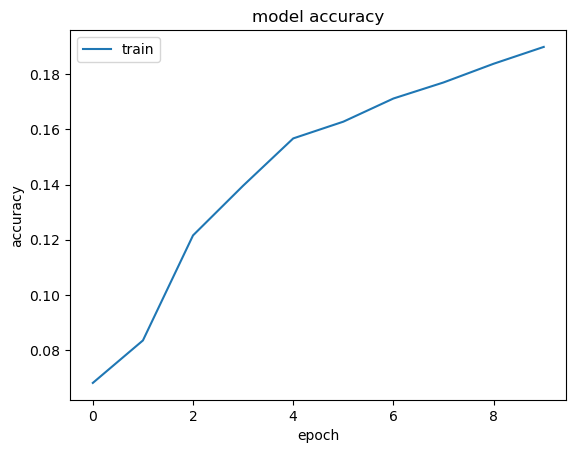

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
seed_text = "Once upon a"
next_words = 30
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

2024-07-03 10:08:11.940361: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-07-03 10:08:11.941230: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-07-03 10:08:11.941799: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 10ms/step
Once upon a time there lived a king who had been <OOV> to <OOV> the <OOV> of the <OOV> and <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV>
